## import 包

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

## 读数据，预处理

In [2]:
df = pd.read_csv('~/KDD_CUP_2022/input/sdwpf134_initial_kddcup.csv')

def get_date(k):
    cur_date = "2020-01-01"
    one_day = timedelta(days=k-1)
    return str(datetime.strptime(cur_date, '%Y-%m-%d') + one_day)[:10]

df['Day'] = df['Day'].apply(lambda x: get_date(x))

def cols_concat(df, con_list):
    name = 't1'
    df[name] = df[con_list[0]].astype(str)
    for item in con_list[1:]:
        df[name] = df[name] + ' ' + df[item].astype(str)
    return df

df = cols_concat(df, ["Day", "Tmstamp"])

df = df[['TurbID', 't1', 'Wspd', 'Wdir', 'Etmp', 'Itmp', 'Ndir', 'Pab1', 'Pab2', 'Pab3', 'Prtv', 'Patv']]
df['t1'] = pd.to_datetime(df['t1'])

In [3]:
df

,TurbID,t1,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv
0,1,2020-01-01 00:00:00,2.81,-2.00,16.61,30.95,148.0,0.03,0.03,0.03,-19.38,111.13
1,1,2020-01-01 00:15:00,2.48,-4.30,16.38,30.83,148.0,0.03,0.03,0.03,-15.69,75.30
2,1,2020-01-01 00:30:00,1.16,9.28,16.62,31.05,135.0,0.03,0.03,0.03,-2.50,9.54
3,1,2020-01-01 00:45:00,0.92,14.38,16.13,31.20,148.0,0.04,0.04,0.03,-0.70,0.00
4,1,2020-01-01 01:00:00,1.38,-4.28,15.12,29.52,148.0,89.68,89.69,89.50,-0.30,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
90043,134,2020-01-07 22:45:00,9.94,1.90,22.75,22.63,181.0,90.40,90.39,90.00,-0.30,0.00
90044,134,2020-01-07 23:00:00,9.94,1.90,22.75,22.63,181.0,90.40,90.39,90.00,-0.30,0.00
90045,134,2020-01-07 23:15:00,9.94,1.90,22.75,22.63,181.0,90.40,90.39,90.00,-0.30,0.00
90046,134,2020-01-07 23:30:00,9.94,1.90,22.75,22.63,181.0,90.40,90.39,90.00,-0.30,0.00


## 一键运行

In [4]:
from autox import AutoTS
autots = AutoTS(df = df,
                id_col = 'TurbID',
                time_col = 't1',
                target_col = 'Patv',
                time_varying_cols = ['Wspd', 'Wdir', 'Etmp', 'Itmp', 'Ndir', 'Pab1', 'Pab2', 'Pab3', 'Prtv', 'Patv'],
                time_interval_num = 15,
                time_interval_unit = 'minute',
                forecast_period = 4 * 12,
                mode = 'cnn',
                metric = 'mae')

sub = autots.get_result()
sub.to_csv("./autox_kdd_cnn.csv", index=False)

/home/caihengxing/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/home/caihengxing/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 10)]     0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 48, 50)       1050        ['input_1[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, 48, 50)       5050        ['conv1d[0][0]']                 
                                                                                                  
 dense (Dense)                  (None, 48, 1)        51          ['conv1d_1[0][0]']               
                                                                                            

   INFO ->  [+] predict
100%|██████████| 134/134 [00:18<00:00,  7.42it/s]


In [5]:
sub

,TurbID,t1,Patv
0,1,2020-01-08 00:00:00,175.349411
1,1,2020-01-08 00:15:00,191.652649
2,1,2020-01-08 00:30:00,218.996948
3,1,2020-01-08 00:45:00,223.673462
4,1,2020-01-08 01:00:00,266.733063
...,...,...,...
43,134,2020-01-08 10:45:00,366.377686
44,134,2020-01-08 11:00:00,390.563629
45,134,2020-01-08 11:15:00,401.626404
46,134,2020-01-08 11:30:00,396.145386


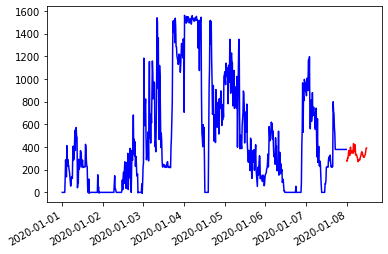

In [18]:
cur_TurbID = 40

plt.plot(df.loc[df['TurbID'] == cur_TurbID, 't1'], df.loc[df['TurbID'] == cur_TurbID, 'Patv'], color = 'b')
plt.plot(sub.loc[sub['TurbID'] == cur_TurbID, 't1'], sub.loc[sub['TurbID'] == cur_TurbID, 'Patv'], color = 'r')
plt.gcf().autofmt_xdate()
plt.show()

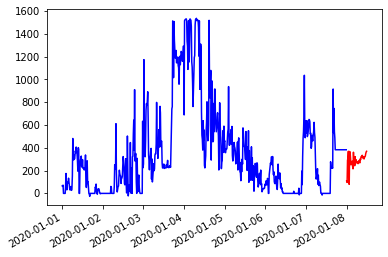

In [42]:
cur_TurbID = 33

plt.plot(df.loc[df['TurbID'] == cur_TurbID, 't1'], df.loc[df['TurbID'] == cur_TurbID, 'Patv'], color = 'b')
plt.plot(sub.loc[sub['TurbID'] == cur_TurbID, 't1'], sub.loc[sub['TurbID'] == cur_TurbID, 'Patv'], color = 'r')
plt.gcf().autofmt_xdate()
plt.show()